# **Firs Class and Higher Order Functions**

A programming language support **first-class functions** when *functions* are treated like any other *variable*, meaning that can be passed as <u>arguments to other functions, returned by other functions, and can be assigned to variables</u>

> **First-class function:** `A function that is treated like any other *variable*`
>
> **Higher-order function:** `A function that accepts another function as *argument*
> or *returns* a function`

Python support both

### **First-Class Example:**

In [ ]:
def square(x):
    return x * x
# Assign function to a variable
f = square
print(f(5))

### **Higher-Order Example:**

In [25]:
def square(x):
    return x * x
    
def my_map(func, arg_list):
    result = []
    for i in arg_list:
        result.append(func(i))
    return result
    
squares = my_map(square, [1, 2, 3, 4, 5])
print(squares)

[1, 4, 9, 16, 25]


# **Functions as values**

In <u>Python</u> functions are just **values like str, int or objects**. We can assing an existing **func to a var**:

In [12]:
def add(x,y): return x+y
#Assign the func to a new var called 'addition'
#It behaves the same as the original 'add' func
addition = add
print(addition(2,5))

7


The **file_to_prompt** function take a <u>file(dict) and a function</u> as inputs, and returns a formatted str.
Notice that the function passed can be used as any var

In [10]:
def file_to_prompt(file, banana):
    return f"```\n{banana(file)}\n```"

def to_string(file):
    return (
        f"File: {file['filename']}\n"
        f"Author: {file['author_first_name']} {file['author_last_name']}\n"
        f"Content: {file['content']}"
    )

In [11]:
run_cases = [
    (
        {
            "filename": "essay.txt",
            "content": "Dear Mr. Vernon, we accept the fact that we had to sacrifice a whole Saturday in detention for whatever it was we did wrong...",
            "author_first_name": "Brian",
            "author_last_name": "Johnson",
        },
        "```\nFile: essay.txt\nAuthor: Brian Johnson\nContent: Dear Mr. Vernon, we accept the fact that we had to sacrifice a whole Saturday in detention for whatever it was we did wrong...\n```",
    ),
    (
        {
            "filename": "letter.txt",
            "content": "But we think you're crazy to make us write an essay telling you who we think we are.",
            "author_first_name": "Brian",
            "author_last_name": "Johnson",
        },
        "```\nFile: letter.txt\nAuthor: Brian Johnson\nContent: But we think you're crazy to make us write an essay telling you who we think we are.\n```",
    ),
]

submit_cases = run_cases + [
    (
        {
            "filename": "note.txt",
            "content": "Does Barry Manilow know that you raid his wardrobe?",
            "author_first_name": "John",
            "author_last_name": "Bender",
        },
        "```\nFile: note.txt\nAuthor: John Bender\nContent: Does Barry Manilow know that you raid his wardrobe?\n```",
    ),
]


def test(input1, expected_output):
    print("---------------------------------")
    print("Inputs:")
    print(f"  filename: {input1['filename']}")
    print(f"  content: {input1['content'][:30]}...")  # Truncate for display
    print(f"  author_first_name: {input1['author_first_name']}")
    print(f"  author_last_name: {input1['author_last_name']}")
    print(f"Expected:\n{expected_output}")
    result = file_to_prompt(input1, to_string)
    print(f"Actual:\n{result}")
    if result == expected_output:
        print("Pass")
        return True
    print("Fail")
    return False


def main():
    passed = 0
    failed = 0
    skipped = len(submit_cases) - len(test_cases)
    for test_case in test_cases:
        correct = test(*test_case)
        if correct:
            passed += 1
        else:
            failed += 1
    if failed == 0:
        print("============= PASS ==============")
    else:
        print("============= FAIL ==============")
    if skipped > 0:
        print(f"{passed} passed, {failed} failed, {skipped} skipped")
    else:
        print(f"{passed} passed, {failed} failed")


test_cases = submit_cases
if "__RUN__" in globals():
    test_cases = run_cases

main()


---------------------------------
Inputs:
  filename: essay.txt
  content: Dear Mr. Vernon, we accept the...
  author_first_name: Brian
  author_last_name: Johnson
Expected:
```
File: essay.txt
Author: Brian Johnson
Content: Dear Mr. Vernon, we accept the fact that we had to sacrifice a whole Saturday in detention for whatever it was we did wrong...
```
Actual:
```
File: essay.txt
Author: Brian Johnson
Content: Dear Mr. Vernon, we accept the fact that we had to sacrifice a whole Saturday in detention for whatever it was we did wrong...
```
Pass
---------------------------------
Inputs:
  filename: letter.txt
  content: But we think you're crazy to m...
  author_first_name: Brian
  author_last_name: Johnson
Expected:
```
File: letter.txt
Author: Brian Johnson
Content: But we think you're crazy to make us write an essay telling you who we think we are.
```
Actual:
```
File: letter.txt
Author: Brian Johnson
Content: But we think you're crazy to make us write an essay telling you who we th

# Anonymous functions or **Lambda Functions**

These functions have no name, and are called **Lambda functions**. These functions return the expression automatically without needing for a *return statement*, and because **functions are values** we can assign the func to a variable:

In [ ]:
add_one = lambda x: x+1
print(add_one(2))

**Lambda functions** return the <u>result of an expression</u>, they're often small, simple evaluations. Here is an example that uses lambda to get a value from a dict:

In [23]:
get_age = lambda name: {'Lane':29,'Hunter':69}.get(name,'not found')
print(get_age('Lane'))

29


In the following example, the function accepts a list of tuples and returns a function for looking up the *file type* of a given file extension

In [18]:
#Accepts a list of tuples, where each tuple contains a 'file type'(e.g. "code", "document", "image", etc)
#and a list of associated file extensions (e.g. [".py", ".js"] or [".docx", ".doc"])
def file_type_getter(file_extension_tuples):
    files_extensions_type = {}
    for file in file_extension_tuples:
        #Only works with this example
        files_extensions_type[file[1][0]] = file[0]
        files_extensions_type[file[1][1]] = file[0]
    
    return lambda file_extension : files_extensions_type.get(file_extension,"Unknown")

In [19]:
run_cases = [
    (
        [("document", [".doc", ".docx"]), ("image", [".jpg", ".png"])],
        ".doc",
        "document",
    ),
    (
        [("document", [".doc", ".docx"]), ("image", [".jpg", ".png"])],
        ".png",
        "image",
    ),
]

submit_cases = run_cases + [
    (
        [("document", [".doc", ".docx"]), ("image", [".jpg", ".png"])],
        ".txt",
        "Unknown",
    ),
    (
        [("code", [".py", ".js"]), ("markup", [".html", ".xml"])],
        ".js",
        "code",
    ),
]


def test(file_extension_tuples, ext, expected_output):
    try:
        print("---------------------------------")
        print("Input tuples:")
        for file_type, exts in file_extension_tuples:
            print(f"  {file_type}: {exts}")
        print(f"Extension: {ext}")
        print(f"Expected: {expected_output}")
        getter_function = file_type_getter(file_extension_tuples)
        result = getter_function(ext)
        print(f"Actual:   {result}")
        if result == expected_output:
            print("Pass")
            return True
        print("Fail")
        return False
    except Exception as e:
        print("Fail")
        print(e)
        return False


def main():
    passed = 0
    failed = 0
    skipped = len(submit_cases) - len(test_cases)
    for test_case in test_cases:
        correct = test(*test_case)
        if correct:
            passed += 1
        else:
            failed += 1
    if failed == 0:
        print("============= PASS ==============")
    else:
        print("============= FAIL ==============")
    if skipped > 0:
        print(f"{passed} passed, {failed} failed, {skipped} skipped")
    else:
        print(f"{passed} passed, {failed} failed")


test_cases = submit_cases
if "__RUN__" in globals():
    test_cases = run_cases

main()

---------------------------------
Input tuples:
  document: ['.doc', '.docx']
  image: ['.jpg', '.png']
Extension: .doc
Expected: document
Actual:   document
Pass
---------------------------------
Input tuples:
  document: ['.doc', '.docx']
  image: ['.jpg', '.png']
Extension: .png
Expected: image
Actual:   image
Pass
---------------------------------
Input tuples:
  document: ['.doc', '.docx']
  image: ['.jpg', '.png']
Extension: .txt
Expected: Unknown
Actual:   Unknown
Pass
---------------------------------
Input tuples:
  code: ['.py', '.js']
  markup: ['.html', '.xml']
Extension: .js
Expected: code
Actual:   code
Pass
============= PASS ==============
4 passed, 0 failed


# **Map**

**Map, filter and reduce** are three commonly used **<u>high-order functions</u>** in *functional programming*. In Python, **map** function takes a function and an iterable as inputs. It returns an iterator that applies the function to every item, yielding the results. With **map**, we can operate on lists without using loops and var
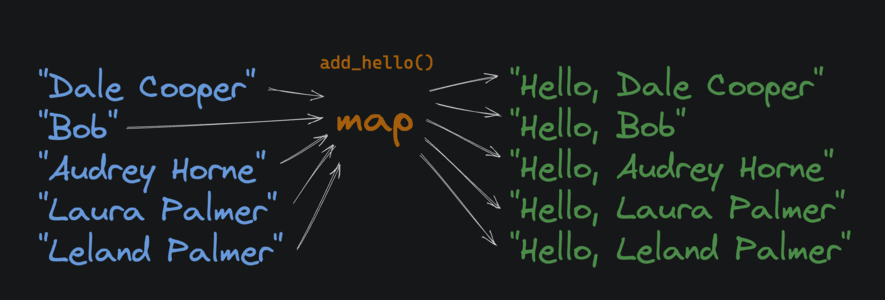

For example, given this code:

In [ ]:
def square(x):
    return x * x
nums = [1, 2, 3, 4, 5]
squared_nums = []
for num in nums:
    num_squared = square(num)
    squared_nums.append(num_squared)
print(squared_nums)

We could use **map()** instead:

In [ ]:
def square(x):
    return x * x
nums = [1, 2, 3, 4, 5]
squared_nums = map(square, nums)
print(list(squared_nums))

In the following example, changing the bullet points - for * in md files

In [36]:
def change_bullet_style(document):
    '''lines_list = document.split("\n")
    converted_lines = map(convert_line,lines_list)
    rejoined_document = "\n".join(list(converted_lines))
    return rejoined_document'''
    return "\n".join(map(convert_line, document.split('\n')))
    
def convert_line(line):
    old_bullet = "-"
    new_bullet = "*"
    if len(line) > 0 and line[0] == old_bullet:
        return new_bullet + line[1:]
    return line

In [37]:
run_cases = [
    (
        "* Alai\n- Dink Meeker\n",
        "* Alai\n* Dink Meeker\n",
    ),
    (
        "* Ender Wiggin\n- Petra Arkanian\n* Bean\n",
        "* Ender Wiggin\n* Petra Arkanian\n* Bean\n",
    ),
]

submit_cases = run_cases + [
    (
        "- Bonzo Madrid\n- Stilson\n- The Formics\n- Peter Wiggin\n- Valentine Wiggin\n- Colonel Graff\n",
        "* Bonzo Madrid\n* Stilson\n* The Formics\n* Peter Wiggin\n* Valentine Wiggin\n* Colonel Graff\n",
    ),
]


def test(input_document, expected_output):
    print("---------------------------------")
    print("Input document:")
    print(input_document)
    print("Expected output:")
    print(expected_output)
    result = change_bullet_style(input_document)
    print("Actual output:")
    print(result)
    if result == expected_output:
        print("Pass")
        return True
    if expected_output.endswith("\n") and not result.endswith("\n"):
        print("Fail")
        print("Reason: expected newline at the end of the output")
        return False
    print("Fail")
    return False


def main():
    passed = 0
    failed = 0
    skipped = len(submit_cases) - len(test_cases)
    for test_case in test_cases:
        correct = test(*test_case)
        if correct:
            passed += 1
        else:
            failed += 1
    if failed == 0:
        print("============= PASS ==============")
    else:
        print("============= FAIL ==============")
    if skipped > 0:
        print(f"{passed} passed, {failed} failed, {skipped} skipped")
    else:
        print(f"{passed} passed, {failed} failed")


test_cases = submit_cases
if "__RUN__" in globals():
    test_cases = run_cases

main()

---------------------------------
Input document:
* Alai
- Dink Meeker

Expected output:
* Alai
* Dink Meeker

Actual output:
* Alai
* Dink Meeker

Pass
---------------------------------
Input document:
* Ender Wiggin
- Petra Arkanian
* Bean

Expected output:
* Ender Wiggin
* Petra Arkanian
* Bean

Actual output:
* Ender Wiggin
* Petra Arkanian
* Bean

Pass
---------------------------------
Input document:
- Bonzo Madrid
- Stilson
- The Formics
- Peter Wiggin
- Valentine Wiggin
- Colonel Graff

Expected output:
* Bonzo Madrid
* Stilson
* The Formics
* Peter Wiggin
* Valentine Wiggin
* Colonel Graff

Actual output:
* Bonzo Madrid
* Stilson
* The Formics
* Peter Wiggin
* Valentine Wiggin
* Colonel Graff

Pass
============= PASS ==============
3 passed, 0 failed


# **Filter**

**Filter** function takes a <u>function and an iterable</u> and returns an **iterator** that only contains an element from the original iterable where the result of the funct on that item returned `True`

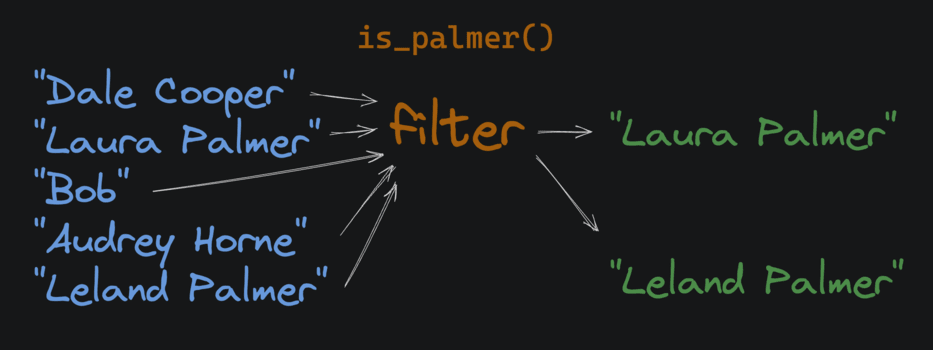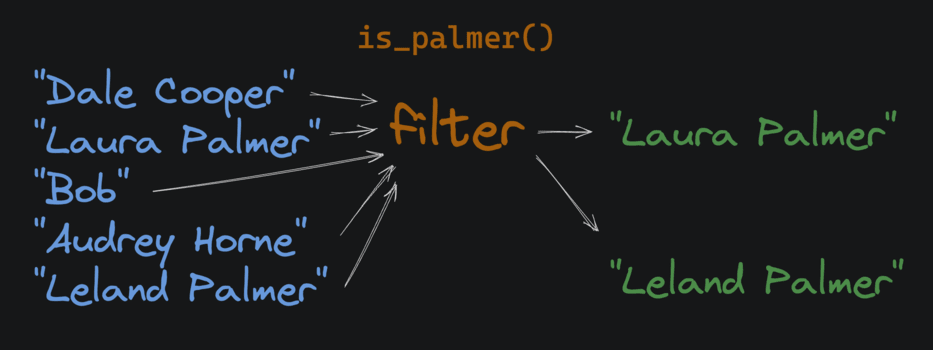

In the following example:

- Using **filter function and a lambda** to return a filtered copy of the input document
- Removing any lines that start with a **-** character
- Keeping all other lines and preserving any `\n`

In [5]:
def remove_invalid_lines(document):
    return "\n".join(
        filter(lambda line: not line.startswith("-"), document.split("\n")))

### <u>***`NOTE: Start with a named def for clarity before using Lambda:`***</u>

In [8]:
def is_valid_line(line):
    return not line.startswith('-')

def remove_invalid_lines(document):    
    return "\n".join(
    filter(is_valid_line, document.split("\n")))

In [9]:
run_cases = [
    (
        "\n* We are the music makers\n- And we are the dreamers of dreams\n* Come with me and you'll be\n",
        "\n* We are the music makers\n* Come with me and you'll be\n",
    ),
    (
        "\n* In a world of pure imagination\n- There is no life I know\n* Living there - you'll be free\n",
        "\n* In a world of pure imagination\n* Living there - you'll be free\n",
    ),
]

submit_cases = run_cases + [
    (
        "\n* If you want to view paradise\n- Simply look around and view it\n* Anything you want to, do it\n* There is no life I know\n- To compare with pure imagination\n* Living there, you'll be free\n",
        "\n* If you want to view paradise\n* Anything you want to, do it\n* There is no life I know\n* Living there, you'll be free\n",
    ),
]


def test(input_document, expected_output):
    print("---------------------------------")
    print("Input document:")
    print('"' + input_document + '"')
    print("Expected output:")
    print('"' + expected_output + '"')
    result = remove_invalid_lines(input_document)
    print("Actual output:")
    print('"' + str(result) + '"')
    if result == expected_output:
        print("Pass")
        return True

    if expected_output.endswith("\n") and not str(result).endswith("\n"):
        print("Fail")
        print("Reason: expected newline at the end of the output")
        return False

    print("Fail")
    return False


def main():
    passed = 0
    failed = 0
    skipped = len(submit_cases) - len(test_cases)
    for test_case in test_cases:
        correct = test(*test_case)
        if correct:
            passed += 1
        else:
            failed += 1
    if failed == 0:
        print("============= PASS ==============")
    else:
        print("============= FAIL ==============")
    if skipped > 0:
        print(f"{passed} passed, {failed} failed, {skipped} skipped")
    else:
        print(f"{passed} passed, {failed} failed")


test_cases = submit_cases
if "__RUN__" in globals():
    test_cases = run_cases

main()

---------------------------------
Input document:
"
* We are the music makers
- And we are the dreamers of dreams
* Come with me and you'll be
"
Expected output:
"
* We are the music makers
* Come with me and you'll be
"
Actual output:
"
* We are the music makers
* Come with me and you'll be
"
Pass
---------------------------------
Input document:
"
* In a world of pure imagination
- There is no life I know
* Living there - you'll be free
"
Expected output:
"
* In a world of pure imagination
* Living there - you'll be free
"
Actual output:
"
* In a world of pure imagination
* Living there - you'll be free
"
Pass
---------------------------------
Input document:
"
* If you want to view paradise
- Simply look around and view it
* Anything you want to, do it
* There is no life I know
- To compare with pure imagination
* Living there, you'll be free
"
Expected output:
"
* If you want to view paradise
* Anything you want to, do it
* There is no life I know
* Living there, you'll be free
"
A

# **Reduce**

**functools.reduce() function** takes a *function and a list* of values, and applies the function to each value in the list, accumulating a single result as it goes

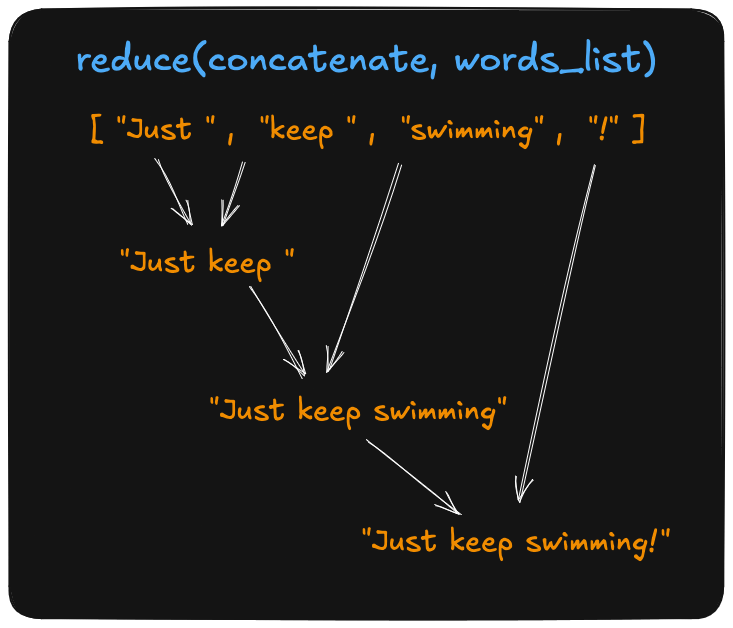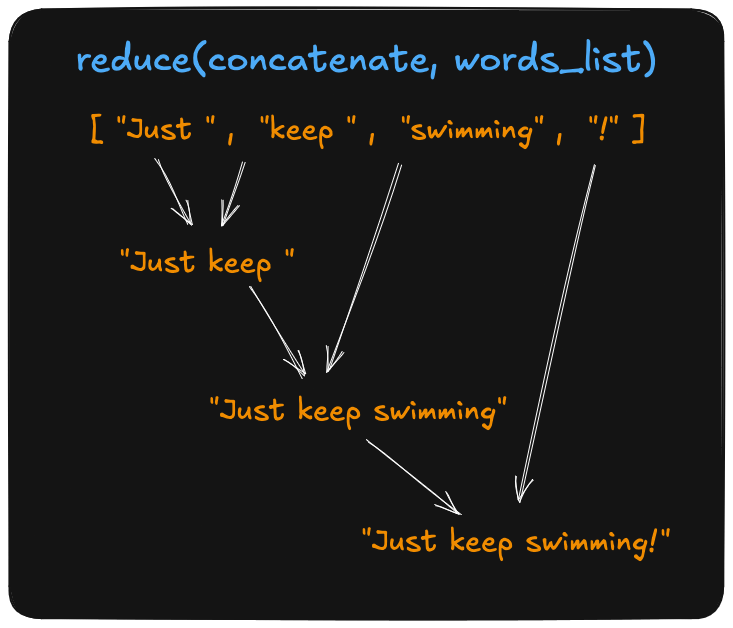

**reduce** take care of the execution of the parameters, so `()` is no needed. Is like handing someone a **recipe** (the instructions), instead of the **finished dish** (the result of the execution)

> In this example, **join()** is a helper function that takes an **accumulator** string and a **string** that is added to the accumulator
> 
> **join_first_sentences()** accepts a **list of sentences** and a **int**. Only using the **n** sentences from the list

In [11]:
import functools
def join(doc_so_far, sentence):
    return ". ".join([doc_so_far, sentence])

def join_first_sentences(sentences, n):
    return "" if n == 0 else f"{functools.reduce(join,sentences[:n])}."

In [12]:
run_cases = [
    (
        ["I don't feel safe", "Are you cussing with me"],
        2,
        "I don't feel safe. Are you cussing with me.",
    ),
    (
        ["You're fantastic", "He's just another rat", "Where'd the food come from"],
        2,
        "You're fantastic. He's just another rat.",
    ),
]

submit_cases = run_cases + [
    (["I'm not different"], 0, ""),
    (
        [
            "You wrote a bad song",
            "This is a good idea",
            "Just buy the tree",
            "It's going to flood",
            "Tell us what to do",
            "Here comes the train",
            "Are you cussing with me?",
            "This is just cider",
            "Get me a bandit hat",
        ],
        3,
        "You wrote a bad song. This is a good idea. Just buy the tree.",
    ),
]


def test(input_sentences, input_n, expected_output):
    print("---------------------------------")
    print("Inputs:")
    print(f" * sentences: {input_sentences}")
    print(f" * n: {input_n}")
    print("Expected:")
    print(f" * {expected_output}")
    result = join_first_sentences(input_sentences, input_n)
    print("Actual:")
    print(f" * {result}")
    if result == expected_output:
        print("Pass")
        return True
    print("Fail")
    return False


def main():
    passed = 0
    failed = 0
    skipped = len(submit_cases) - len(test_cases)
    for test_case in test_cases:
        correct = test(*test_case)
        if correct:
            passed += 1
        else:
            failed += 1
    if failed == 0:
        print("============= PASS ==============")
    else:
        print("============= FAIL ==============")
    if skipped > 0:
        print(f"{passed} passed, {failed} failed, {skipped} skipped")
    else:
        print(f"{passed} passed, {failed} failed")


test_cases = submit_cases
if "__RUN__" in globals():
    test_cases = run_cases

main()

---------------------------------
Inputs:
 * sentences: ["I don't feel safe", 'Are you cussing with me']
 * n: 2
Expected:
 * I don't feel safe. Are you cussing with me.
Actual:
 * I don't feel safe. Are you cussing with me.
Pass
---------------------------------
Inputs:
 * sentences: ["You're fantastic", "He's just another rat", "Where'd the food come from"]
 * n: 2
Expected:
 * You're fantastic. He's just another rat.
Actual:
 * You're fantastic. He's just another rat.
Pass
---------------------------------
Inputs:
 * sentences: ["I'm not different"]
 * n: 0
Expected:
 * 
Actual:
 * 
Pass
---------------------------------
Inputs:
 * sentences: ['You wrote a bad song', 'This is a good idea', 'Just buy the tree', "It's going to flood", 'Tell us what to do', 'Here comes the train', 'Are you cussing with me?', 'This is just cider', 'Get me a bandit hat']
 * n: 3
Expected:
 * You wrote a bad song. This is a good idea. Just buy the tree.
Actual:
 * You wrote a bad song. This is a good idea

# **Zip**

This function takes two **iterables** and returns a new **iterable,** where each element is a tuple containing one element from each of the original iterables

> In this example, the function takes two lists of str as input
>
> Then **`zip`** up the lists into a single list of tuples
>
> Lastly **`filter`** the tuples to only include tuples where the format is one of the given **valid_formats**

In [16]:
valid_formats = ["docx","pdf","txt","pptx","ppt","md",]
def pair_document_with_format(doc_names, doc_formats):
    return list(filter(
        lambda tuple: tuple[1] in valid_formats,
        list(zip(doc_names,doc_formats))))

In [17]:
run_cases = [
    (
        (["Proposal", "Invoice", "Contract"], ["docx", "pdoof", "txt"]),
        [("Proposal", "docx"), ("Contract", "txt")],
    ),
    (
        (["Presentation", "Summary"], ["pptx", "docx"]),
        [("Presentation", "pptx"), ("Summary", "docx")],
    ),
]

submit_cases = run_cases + [
    (([], []), []),
    ((["Test", "Example"], ["ppt", "docx"]), [("Test", "ppt"), ("Example", "docx")]),
    (
        (
            ["Python Cheatsheet", "Java Cheatsheet", "Malware", "Golang Cheatsheet"],
            ["pdf", "docx", "trash", "docx"],
        ),
        [
            ("Python Cheatsheet", "pdf"),
            ("Java Cheatsheet", "docx"),
            ("Golang Cheatsheet", "docx"),
        ],
    ),
]


def test(input1, expected_output):
    print("---------------------------------")
    print(f"Inputs:")
    print(f" * doc_names: {input1[0]}")
    print(f" * doc_formats: {input1[1]}")
    print(f"Expected: {expected_output}")
    try:
        result = pair_document_with_format(*input1)
    except Exception as e:
        result = f"Error: {e}"
    print(f"Actual:   {result}")
    if result == expected_output:
        print("Pass")
        return True
    print("Fail")
    return False


def main():
    passed = 0
    failed = 0
    skipped = len(submit_cases) - len(test_cases)
    for test_case in test_cases:
        correct = test(*test_case)
        if correct:
            passed += 1
        else:
            failed += 1
    if failed == 0:
        print("============= PASS ==============")
    else:
        print("============= FAIL ==============")
    if skipped > 0:
        print(f"{passed} passed, {failed} failed, {skipped} skipped")
    else:
        print(f"{passed} passed, {failed} failed")


test_cases = submit_cases
if "__RUN__" in globals():
    test_cases = run_cases

main()


---------------------------------
Inputs:
 * doc_names: ['Proposal', 'Invoice', 'Contract']
 * doc_formats: ['docx', 'pdoof', 'txt']
Expected: [('Proposal', 'docx'), ('Contract', 'txt')]
Actual:   [('Proposal', 'docx'), ('Contract', 'txt')]
Pass
---------------------------------
Inputs:
 * doc_names: ['Presentation', 'Summary']
 * doc_formats: ['pptx', 'docx']
Expected: [('Presentation', 'pptx'), ('Summary', 'docx')]
Actual:   [('Presentation', 'pptx'), ('Summary', 'docx')]
Pass
---------------------------------
Inputs:
 * doc_names: []
 * doc_formats: []
Expected: []
Actual:   []
Pass
---------------------------------
Inputs:
 * doc_names: ['Test', 'Example']
 * doc_formats: ['ppt', 'docx']
Expected: [('Test', 'ppt'), ('Example', 'docx')]
Actual:   [('Test', 'ppt'), ('Example', 'docx')]
Pass
---------------------------------
Inputs:
 * doc_names: ['Python Cheatsheet', 'Java Cheatsheet', 'Malware', 'Golang Cheatsheet']
 * doc_formats: ['pdf', 'docx', 'trash', 'docx']
Expected: [('Pytho

# **`Higher Order Functions Practice`**

This function takes two tuples of document strings as inputs and returns a set with all the documents upper and without digits

In [19]:
def restore_documents(originals, backups):
    return set(filter(
    lambda line: not line.isdigit(), 
    map(lambda str: str.upper(),
        originals+backups)))

In [21]:
run_cases = [
    (
        (
            ("Mortgage", "Marriage Certificate", "Boot.dev Certificate"),
            ("VEHICLE TITLE", "MORTGAGE"),
        ),
        {"MORTGAGE", "MARRIAGE CERTIFICATE", "BOOT.DEV CERTIFICATE", "VEHICLE TITLE"},
    ),
    (
        (
            ("ANNUITY", "WATER BILL"),
            ("Photo Album", "1235023451345", "Year Book"),
        ),
        {"ANNUITY", "WATER BILL", "PHOTO ALBUM", "YEAR BOOK"},
    ),
]

submit_cases = run_cases + [
    (((), ()), set()),
    (
        (
            ("RECEIPT FOR 1st AND LAST RENT", "School Loan"),
            ("SCOOTER REGISTRATION", "314159", "ENGLISH MAJOR DEGREE"),
        ),
        {
            "RECEIPT FOR 1ST AND LAST RENT",
            "SCHOOL LOAN",
            "SCOOTER REGISTRATION",
            "ENGLISH MAJOR DEGREE",
        },
    ),
]


def test(input1, expected_output):
    print("---------------------------------")
    print(f"Inputs:")
    print(f" * damaged documents: {input1[0]}")
    print(f" * back-up documents: {input1[1]}")
    print(f"Expected: {expected_output}")
    try:
        result = restore_documents(*input1)
    except Exception as e:
        result = f"Error: {e}"
    print(f"Actual:   {result}")
    if result == expected_output:
        print("Pass")
        return True
    print("Fail")
    return False


def main():
    passed = 0
    failed = 0
    skipped = len(submit_cases) - len(test_cases)
    for test_case in test_cases:
        correct = test(*test_case)
        if correct:
            passed += 1
        else:
            failed += 1
    if failed == 0:
        print("============= PASS ==============")
    else:
        print("============= FAIL ==============")
    if skipped > 0:
        print(f"{passed} passed, {failed} failed, {skipped} skipped")
    else:
        print(f"{passed} passed, {failed} failed")


test_cases = submit_cases
if "__RUN__" in globals():
    test_cases = run_cases

main()


---------------------------------
Inputs:
 * damaged documents: ('Mortgage', 'Marriage Certificate', 'Boot.dev Certificate')
 * back-up documents: ('VEHICLE TITLE', 'MORTGAGE')
Expected: {'MARRIAGE CERTIFICATE', 'VEHICLE TITLE', 'BOOT.DEV CERTIFICATE', 'MORTGAGE'}
Actual:   {'MARRIAGE CERTIFICATE', 'VEHICLE TITLE', 'BOOT.DEV CERTIFICATE', 'MORTGAGE'}
Pass
---------------------------------
Inputs:
 * damaged documents: ('ANNUITY', 'WATER BILL')
 * back-up documents: ('Photo Album', '1235023451345', 'Year Book')
Expected: {'PHOTO ALBUM', 'WATER BILL', 'YEAR BOOK', 'ANNUITY'}
Actual:   {'PHOTO ALBUM', 'WATER BILL', 'YEAR BOOK', 'ANNUITY'}
Pass
---------------------------------
Inputs:
 * damaged documents: ()
 * back-up documents: ()
Expected: set()
Actual:   set()
Pass
---------------------------------
Inputs:
 * damaged documents: ('RECEIPT FOR 1st AND LAST RENT', 'School Loan')
 * back-up documents: ('SCOOTER REGISTRATION', '314159', 'ENGLISH MAJOR DEGREE')
Expected: {'RECEIPT FOR 1ST 